# FARGOpy
## Wrapping FRAGO3D

<!-- This are visual tags that you may add to your package at the beginning with useful information on your package --> 
[![version](https://img.shields.io/pypi/v/fargopy?color=blue)](https://pypi.org/project/fargopy/)
[![downloads](https://img.shields.io/pypi/dw/fargopy)](https://pypi.org/project/fargopy/)

`FARGOpy` is a python wrapping for [`FARGO3D`](https://fargo3d.bitbucket.io/intro.html)., the well-knwon hydrodynamics and magnetohydrodynamics parallel code. This wrapping is intended to ensue the interaction with FARGO3D especially for those starting using the code, for instance for teaching and training purposes, but also provide functionalities for most advanced users in tasks related to the postprocessing of output files and plotting.

<p align="center"><img src="https://github.com/seap-udea/fargopy/blob/main/gallery/fargo-animation.gif?raw=true" alt="Animation""/></p>

## Download and install FARGO3D

For using `FARGOpy` you first need to download and install `FARGO3D` and all its prerequisites. For a detailed guide please see the [FARGO documentation](https://fargo3d.bitbucket.io/index.html) or the [project repo at bitbucket](https://bitbucket.org/fargo3d/public/src/ae0fcdc67bb7c83aed85fc9a4d4a2d5061324597/?at=release%2Fpublic). Still, `FARGOpy` provides some useful commands and tools to test the platform on which you are working and check if it is prepared to use the whole functionalities of the packages or part of them.

> **NOTE**: It is important to understand that `FARGO3D` works especially well on Linux plaforms (including `MacOS`). The same condition applies for `FARGOpy`. Because of that, most internal as well as public features of the packages are designed to work in a `Linux` environment. For working in another operating systems, for instance for teaching or training purposes, please consider to use virtual machines.

Still, `fargopy` provides a simple way to get the latest version of `FARGO3D`. For this just run in the terminal:

 ```shell
$ ifargopy download
```

A copy of `FARGO3D` will be download in the directory where the command is executed with the name `./fargo3d/`

## Quickstart

There are three modalities for using `fargopy`:

1. **FARGO3D expert**. In this modality you already have a `FARGO3D` installation and want to use `fargopy` to manipulate input and output files.

2. **FARGO3D newbie**. In this modality you are starting to use `FARGO3D` and want to use some of the tools available in `fargopy` to compile, run and analyse the output.

3. Something in the middle.

In the following we will explain the basic functionalities that might result useful in each modality.


For this quickstart let's load this utilities:

In [1]:
from fargopy import DEG, RAD
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

Running FARGOpy version 0.1.3


### `FARGO3D` expert mode

To use `fargopy` in the case that you already have some simulation results, run the `ifargopy` script:

```shell
$ ifargopy
```

This command will start a session of `IPython` and initialize `fargopy`. Alternatively you may prefer to work in a `Jupyter` notebook. In both cases, the first thing to do is to import `fargopy`.

In [2]:
import fargopy as fp
%load_ext autoreload
%autoreload 2

When you run `fargopy` from the command line using `ifargopy` the previous import command is included in the initialization script.

> **NOTE**: For the purpose of this example, we will assume that you already have a copy of `FARGO3D` in a directory named `./fargo3d/`. Additionally we assume that for illustration purposes you have ran the `fargo` setup and have all or part of the outputs in the folder `./fargo3d/outputs/fargo`. If you have never used fargo3d, and still want to use this part of the Quickstart, ran these commands in the terminal (still, a more detailed guide to `FARGO3D` and how to compile, configure and run it is described in the *newbie* section of this Quickstart):

```shell
ifargopy download
cd fargo3d/
make SETUP=fargo
./fargo3d setups/fargo/fargo.par
```

#### Basic commands

Any operation in `fargopy` requires the creation of a simulation:

In [3]:
sim = fp.Simulation()

Set the directory where the outputs are located: 

In [4]:
sim.set_output_dir('./fargo3d/outputs/fargo')

Now you are connected with output directory './fargo3d/outputs/fargo'


List the files available in the output directory:

In [5]:
outputs = sim.list_outputs()

271 files in output directory
IDL.var, bigplanet0.dat, dims.dat, domain_x.dat, domain_y.dat, domain_z.dat, gasdens0.dat, gasdens0_2d.dat, gasdens1.dat, gasdens10.dat, 
gasdens11.dat, gasdens12.dat, gasdens13.dat, gasdens14.dat, gasdens15.dat, gasdens16.dat, gasdens17.dat, gasdens18.dat, gasdens19.dat, gasdens2.dat, 
gasdens20.dat, gasdens21.dat, gasdens22.dat, gasdens23.dat, gasdens24.dat, gasdens25.dat, gasdens26.dat, gasdens27.dat, gasdens28.dat, gasdens29.dat, 
gasdens3.dat, gasdens30.dat, gasdens31.dat, gasdens32.dat, gasdens33.dat, gasdens34.dat, gasdens35.dat, gasdens36.dat, gasdens37.dat, gasdens38.dat, 
gasdens39.dat, gasdens4.dat, gasdens40.dat, gasdens41.dat, gasdens42.dat, gasdens43.dat, gasdens44.dat, gasdens45.dat, gasdens46.dat, gasdens47.dat, 
gasdens48.dat, gasdens49.dat, gasdens5.dat, gasdens50.dat, gasdens6.dat, gasdens7.dat, gasdens8.dat, gasdens9.dat, gasenergy0.dat, gasenergy1.dat, 
gasenergy10.dat, gasenergy11.dat, gasenergy12.dat, gasenergy13.dat, gasenergy14.dat

The files describing the basic properties of the simulations are `dims.dat`, `variables.par` and `domain_*.dat`. You may load the information in these files:

In [6]:
vars, domains = sim.load_properties()

Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Configuration variables and domains load into the object. See e.g. <sim>.vars


#### Load field data into memory

The outputs of a simulation are given as datafiles containing the value of different fields in the coordinate grid. You can load a single field:

In [7]:
gasdens0 = sim.load_field('gasdens',snapshot=0)
gasdens0, gasdens0.data.shape

([[[0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   ...
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]]],
 (1, 128, 384))

As you can see, fields are loaded as special `Field` objects (see `fp.Field?` for a list of attributes and methods), whose most important attribute is `data` which is the `numpy` array containing the values of the field in the coordinate domain.

Vectorial fields are special cases. In `FARGO3D` each component of the field is separated by file suffixes such as `x`, `y` and `z` (even if you are working in different coordinate systems). `fargopy` is able to load all components if a vector field using:

In [8]:
vel = sim.load_field('gasv',snapshot=0,type='vector')
vel.data.shape

(2, 1, 128, 384)

As you can see, the first index correspond to the component of the field (`x` and `y` in the `FARGO3D` convention, but actually `phi` and `r` in cylindrical coordinates). The second index is the `z` coordinate, the third the `y` coordinate (`r` in the cylindrical system of coordinates) and the fourh is the `z` coordinate (`phi` in the cylindrical system of coordinates).

Depending on the size of the outputs, you can also load all physical fields in the output associated to a given fluid. Use this method with caution:

In [9]:
fields0 = sim.load_allfields('gas',snapshot=0)
fields0.keys(), fields0.size

(['gasdens', 'gasenergy', 'gasvx', 'gasvy', 'size'], 1.5)

Size here is given in Megabytes.

If you want all the fields drop the `snapshot` option (or set in `None`):

In [10]:
fields = sim.load_allfields('gas')
fields.print_keys()
fields.item('0').keys(), fields.size

0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 
18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 
27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 
36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 
45, 46, 47, 48, 49, 5, 50, 6, 7, 8, 
9, size


(['gasdens', 'gasenergy', 'gasvx', 'gasvy'], 76.5)

In [11]:
fields.item('0').gasdens.data.shape

(1, 128, 384)

As you may see, the size of the fields start to be considerable large (36 MB in this case), so it is important to not abusing of this command.

#### Field slices

Once you have loaded a given field you may want to extract a slice for plotting. Let's for instance plot the density as a function of distance in the example simulation at a given snapshot:

In [12]:
gasdens10 = sim.load_field('gasdens',snapshot=10)
gasdens10.data.shape

(1, 128, 384)

Let's extract the density of the gas at `phi=0` and `z=0`:

In [13]:
gasdens_r = gasdens10.slice(phi=0,z=0)
gasdens_r.shape

(128,)

And plot:

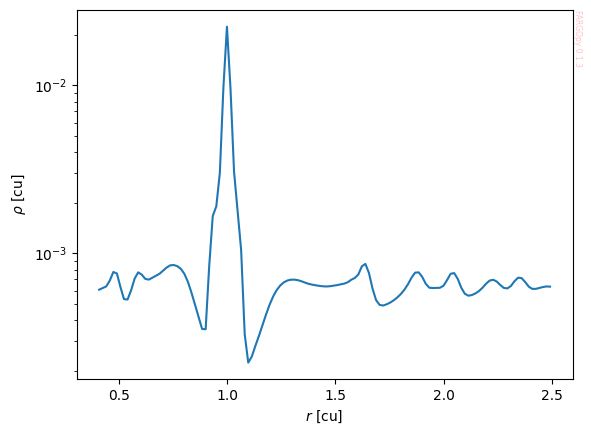

In [14]:
fig,ax = plt.subplots()
ax.semilogy(sim.domains.r,gasdens_r)
ax.set_xlabel(r"$r$ [cu]")
ax.set_ylabel(r"$\rho$ [cu]")
fp.Util.fargopy_mark(ax);

We can do this in a single step with `fargopy`:

In [15]:
gasdens, mesh = gasdens10.meshslice(slice='z=0,phi=0')

The object `mesh` now contains matrices of the coordinates:

In [16]:
mesh.keys()

['r', 'phi', 'x', 'y', 'z']

If you are plotting `r` vs. `gasdens` the plot will be:

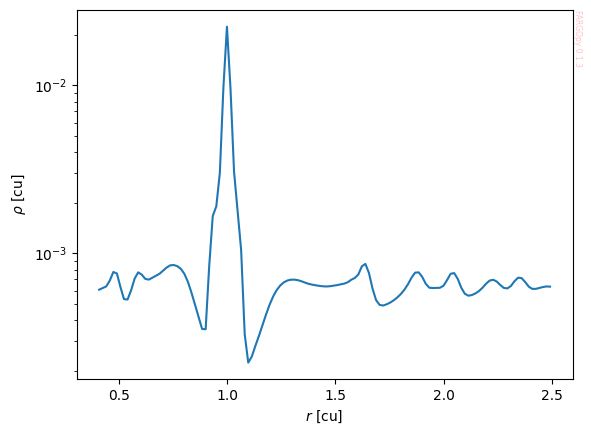

In [17]:
fig,ax = plt.subplots()
ax.semilogy(mesh.r,gasdens)
ax.set_xlabel(r"$r$ [cu]")
ax.set_ylabel(r"$\rho$ [cu]")
fp.Util.fargopy_mark(ax);

This simple procedure reduce considerably the creation of more complex plots, for instance, a map of the density in different planes:

In [18]:
gasdens, mesh = gasdens10.meshslice(slice='z=0')

And plot it:

(-2.5002509788199982, 2.499916334793502, -2.499916334793502, 2.499916334793502)

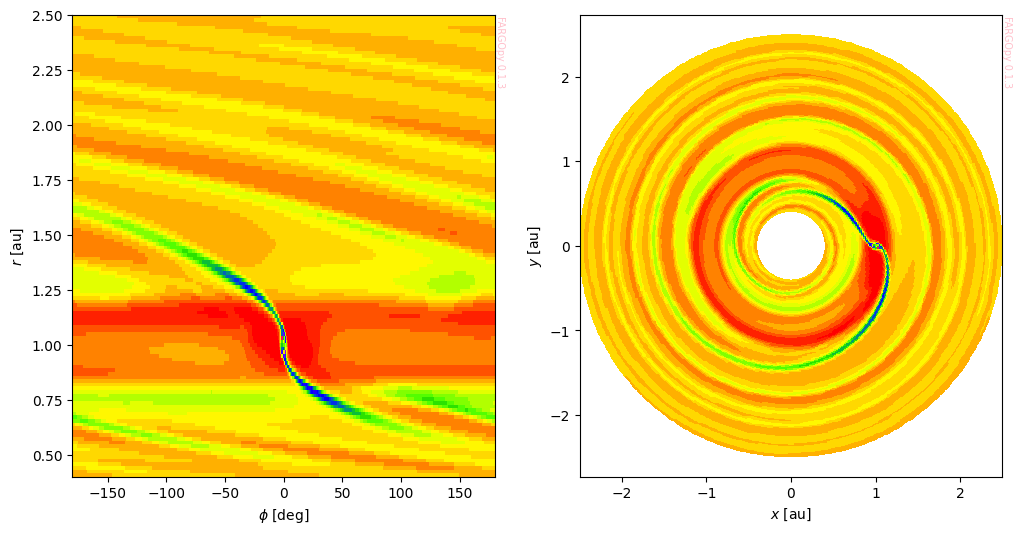

In [20]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

ax = axs[0]
ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap='prism')
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$r$ [au]')
fp.Util.fargopy_mark(ax)

ax = axs[1]
ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,
              gasdens,cmap='prism')
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$y$ [au]')
fp.Util.fargopy_mark(ax)
ax.axis('equal')

Let's create an animation for illustrating how easy `FARGOpy` make life:

Now you are connected with output directory './fargo3d/outputs/fargo'
Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Configuration variables and domains load into the object. See e.g. <sim>.vars


  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:01<00:00, 30.11it/s]


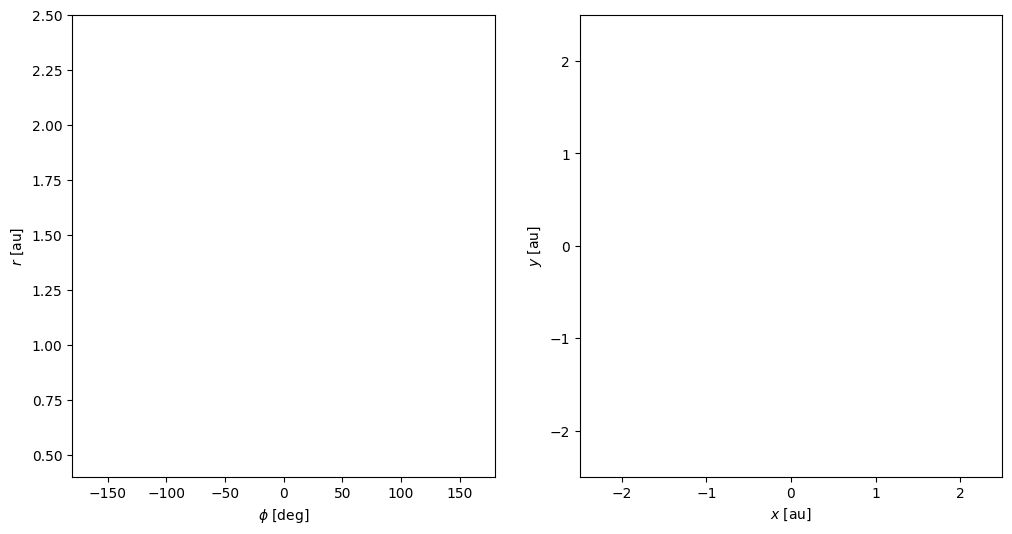

In [63]:
from celluloid import Camera
from tqdm import tqdm

sim = fp.Simulation()
sim.set_output_dir('./fargo3d/outputs/fargo')
sim.load_properties()

gasdens_all = sim.load_allfields('gasdens')
fig,axs = plt.subplots(1,2,figsize=(12,6))

cmap = 'prism'
camera = Camera(fig)
for snapshot in tqdm(gasdens_all.snapshots):
    gasdens_snap = gasdens_all.item(str(snapshot)).gasdens
    gasdens,mesh = gasdens_snap.meshslice(slice='z=0')

    ax = axs[0]
    ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap=cmap)
    ax.set_xlabel('$\phi$ [deg]')
    ax.set_ylabel('$r$ [au]')

    ax = axs[1]
    ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,gasdens,cmap=cmap)
    ax.set_xlabel('$x$ [au]')
    ax.set_ylabel('$y$ [au]')
    fp.Util.fargopy_mark(ax)

    camera.snap()

animation = camera.animate()
animation.save('gallery/fargo-animation.gif')
HTML(animation.to_html5_video())

### `FARGO3D` newbie

This section is under development.

## What's new


Version 0.2.*:

- Major 

Version 0.1.*:

- Package is now provided with a script 'ifargopy' to run 'ipython' with fargopy initialized.
- A new 'progress' mode has been added to status method.
- All the dynamics of loading/compiling/running/stoppìng/resuming FARGO3D has been developed.

Version 0.0.*:

- First classes created.
- The project is started!

------------

This package has been designed and written mostly by Jorge I. Zuluaga with advising and contributions by Matías Montesinos (C) 2023
